# Кластеризация

### Задания для выполнения
1) Загрузите прилагающийся датасет.

2) Проверьте датасет на наличие пустых значений. Если есть пустые значения, то заменить их на наиболее подходящие.

3) Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score.

4) Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.

5) Обучить модель К-средних и предсказать кластер для каждого значения из датасета.

6) Построить графическую интерпретацию из пункта 3, с центрами кластеров.

7) Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.

8) Оцените модель с помощью метрик.

9) Сравните эффективность модели кластеризации в зависимости от количества кластеров. Сделайте выводы.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "Score"}, inplace=True)
df.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return mis_val_table_ren_columns

In [6]:
missing_values_table(df)

,Missing Values,% of Total Values


In [7]:
gend = np.unique(df['Genre'].values)
val=[i+1 for i in range(len(gend))]
gen1=dict(zip(gend,val))

In [8]:
pd.options.mode.chained_assignment = None
for i in range(len(df)):
    a = df['Genre'][i]
    df['Genre'][i] = gen1[a]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Genre       200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df

,CustomerID,Genre,Age,Income,Score
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,2,32,126,74
198,199,2,32,137,18


#### Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score.

<AxesSubplot: xlabel='Income', ylabel='Score'>

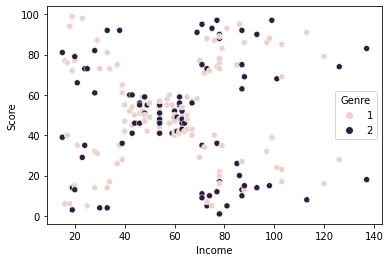

In [11]:
sns.scatterplot(x = 'Income' , y = 'Score',data = df , hue='Genre')

#### Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.

In [15]:
import warnings
warnings.filterwarnings('ignore')

Siluette score:  0.4793 ; количество кластеров: 2
Calinski score:  301.0145 ; количество кластеров: 2
Siluette score:  0.3767 ; количество кластеров: 3
Calinski score:  255.5499 ; количество кластеров: 3
Siluette score:  0.4225 ; количество кластеров: 4
Calinski score:  260.8338 ; количество кластеров: 4
Siluette score:  0.4231 ; количество кластеров: 5
Calinski score:  253.8518 ; количество кластеров: 5
Siluette score:  0.4095 ; количество кластеров: 6
Calinski score:  269.8626 ; количество кластеров: 6
Siluette score:  0.4038 ; количество кластеров: 7
Calinski score:  266.1324 ; количество кластеров: 7
Siluette score:  0.4057 ; количество кластеров: 8
Calinski score:  283.1701 ; количество кластеров: 8
Siluette score:  0.4006 ; количество кластеров: 9
Calinski score:  278.9211 ; количество кластеров: 9
Siluette score:  0.3924 ; количество кластеров: 10
Calinski score:  277.7841 ; количество кластеров: 10


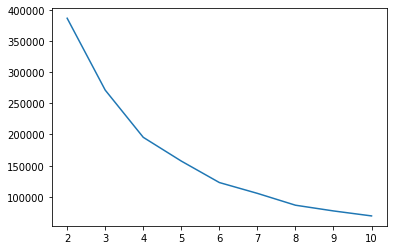

In [28]:
wcss = []
x=df.to_numpy()
for i in range(2,11):
    k_means = KMeans(n_clusters=i,random_state=42).fit(x)
#     k_means.fit(x)
    fit_score = k_means.fit_predict(x)
    print("Siluette score: ", round(silhouette_score(x, fit_score), 4), f"; количество кластеров: {i}")
    print("Calinski score: ", round(calinski_harabasz_score(x, fit_score), 4), f"; количество кластеров: {i}")
    wcss.append(k_means.inertia_)
plt.plot(range(2,11),wcss)
plt.xticks(range(2,11))
plt.show()

#### Обучить модель К-средних и предсказать кластер для каждого значения из датасета.

In [ ]:
X=df.to_numpy()
kmeans = KMeans(n_clusters = 5).fit(X)
# predskaz = kmeans.predict(X)

#### Построить графическую интерпретацию из пункта 3, с центрами кластеров.

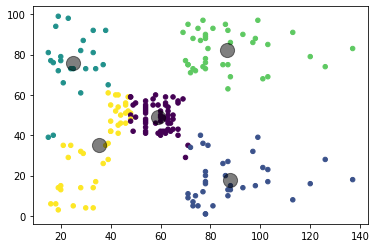

In [19]:
plt.scatter(df.Income, df.Score, c=kmeans.predict(X), s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 3], centers[:, 4], c='black', s=200, alpha=0.5)

#### Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.

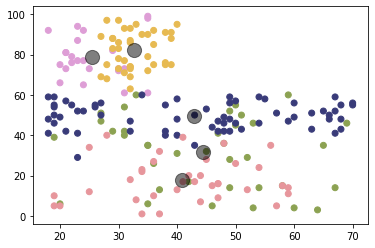

In [17]:
plt.scatter(df.Age, df.Score,c = kmeans.predict(X),cmap='tab20b')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 4], c='black', s=200, alpha=0.5)